# **Исследование факторов успешности продаж компьютерной игры**

Заказчик проекта - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). **Необходимо выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные предоставлены за 2016 год. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Гипотезы и исследовательские вопросы

Главной **задачей** данного исследования является определение факторов, которые определяют успешность игры для прогнозирования кампании на следующий 2017 год.  
Поставленная задача формирует несколько основных и побочных **исследовательских вопросов**:  
- сколько игр выпускалось в разные годы? 
- как изменялись продажи по разным платформам?  
- каков актуальный период для анализа данных?  
- какие платформы лидируют по продажам?  
- влияют ли отзывы пользователей и критиков на продажи?  
- каковы самые прибыльные жанры?  
- какие факторы влияют на успешность игры?  
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

В рамках данного исследования поставлены следующие **гипотезы**:  
- Прибыльными платформами - PS любого номера, Wii, Xbox и DS.  
- Отзывы пользователей влияют на продажи игр.  
- Отзывы критиков влияют на продажи игр. 
- Прибыльные жанры игр -  Shooter, Sports, Racing и Action.  
- То, на какой игровой платформе размещена игра влияет на успешность продажи игры.   
- Рейтинг ESRB влияет на продажи. 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
- Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

# План проекта

Исследование будет проводиться согласно данному **плану работ**:  
1. Знакомство с данными.  
- первичный анализ куска датасета, чтобы запланировать корректировки, если они обнаружатся.  
- визуализировать те данные, которые находятся в датасете до предобработки данных.  
2. Предобработка данных.  
- привести названия колонок к нижнему регистру.  
- работа с дубликатами.
- работа с пропусками. 
- корректировка типов данных.  
- анализ уникальных значений и работа с аномалиями.  
3. Добавить новые даннные для дальнейшего анализа.  
4. Собственно провести исследовательский анализ данных.  
- визуализировать и изучить данные после этапа предобработки.  
- найти актуальный период для дальнейшего анализа.  
- проверка гипотез.  
- проверка исследовательских вопросов.  
- составить портрет пользователя каждого региона.
5. Общий вывод.

# Предоставленные заказчиком данные

Датасет содержит в себе следующие данные:

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Знакомство с данными

Для начала я импортирую необходимые для работы библиотеки

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import stats as st
import numpy as np

Далее я открою файл для чтения одним из путей:

In [3]:
way_1 = '/Users/anastasiaklubkova/Downloads/games.csv'
way_2 = '/datasets/games.csv'

In [4]:
if os.path.exists(way_1):
    data = pd.read_csv(way_1)
    print('Открыто локально')
elif os.path.exists(way_2):
    data = pd.read_csv(way_2)
    print('Открыто через ЯП')
else:
    print('Что-то пошло не так')

Открыто локально


In [5]:
#первичное знакомство с данными таблицы
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
#более детальное знакомство с данными - изучение типов данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

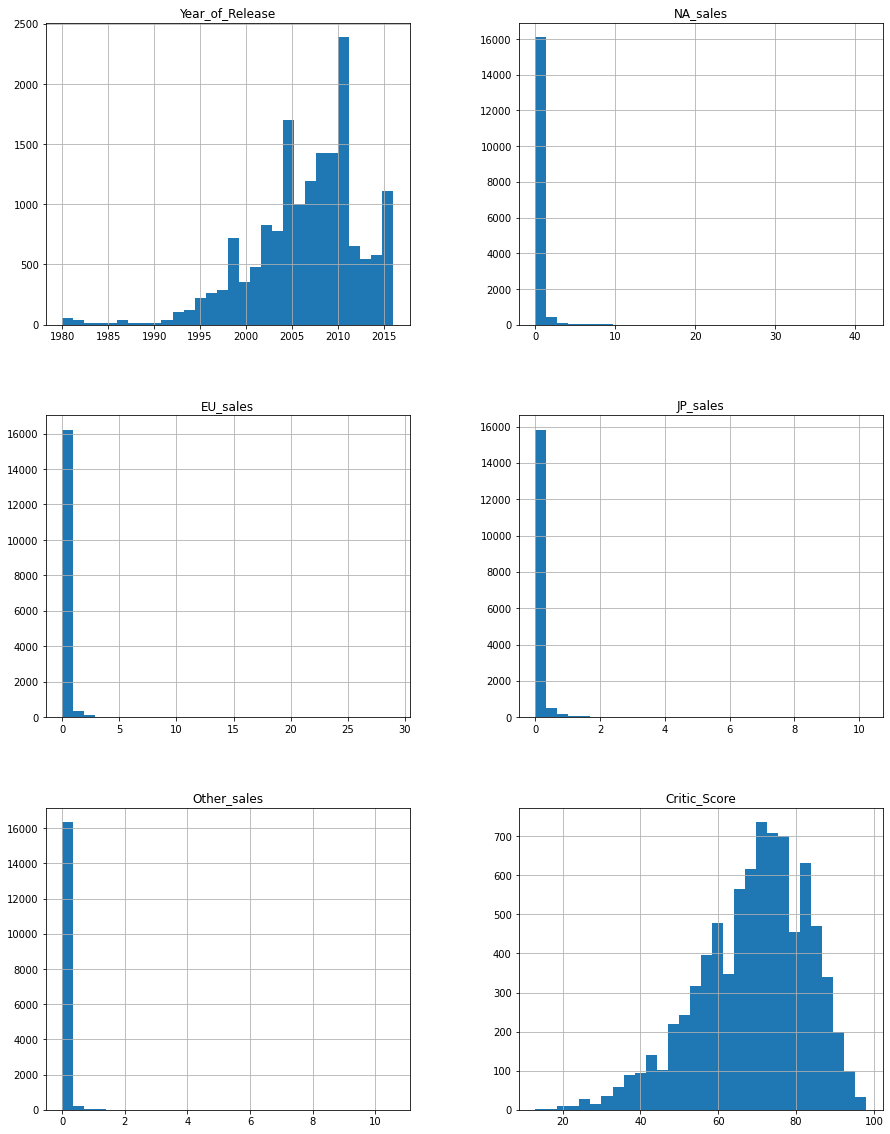

In [5]:
#визуализация данных может помочь увидеть то, что осталось незамеченным на прошлых этапах знакомства с данными
data.hist(figsize=(15, 20), bins = 30)

**Вывод:**  
На этапе предварительного первичного анализа можно сделать несколько выводов:  
- с каждым годом общее количество выпущенных игр растет, есть пара пиковых значений.  
- медиана оценок критиков смещена в сторону значений, выше среднего.  
- присутсвует смещение влево у данных, показывающих продажи, что говорит о том, что более низкие значения встречаются чаще. 
- по части данных пока сложно сделать выводы, поскольку выбросы делают гистограммы не информативными (гистограммы показывающие продажи). Следует обратить на них внимание.  

## Предобработка данных

### работа с названием колонок

In [6]:
# прежде всего следует привести названия колонок датасета к нижнему регистру, для удобства дальнейшего анализа 
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### работа с дубликатами

In [7]:
#проверим количество явных дубликатов
data.duplicated().sum()

0

### работа с пропусками

In [8]:
#определяем сколько пропусков в каждом столбце
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Обнаружены пропуски в 5 столбцах из 11. Следует проанализировать их природу. Из ячейки info() видно, что всего значений должно быть 16715.
Как известно, существуют несколько типов причин появления пропусков:

Missing Completely At Random - появление пропусков абсолютно не объяснимо другими переменными  
Missing At Random - появление пропусков объяснимо другими переменными с полной информацией  
Missing Not At Random - пропуск зависит от информации о переменной, а также определяется данными  

Соответственно, если разбить колонки с пропусками по этим 3м группам, то вероятность корректного заполнения вырастет.

#### name

Эти пропуски относятся к типу Missing Completely At Random, то их невозможно восстановить. Так как эти пропуски составляют менее 1 %, то данные из этих строчек можно удалить без вреда данным.

In [9]:
data.dropna(subset= ['name'], inplace=True)
data['name'].isna().sum()

0

#### year_of_release

Эти пропуски относятся к типу Missing Completely At Random, то их невозможно восстановить. Так как эти пропуски составляют около 1 %, то данные из этих строчек можно удалить без вреда данным.

In [10]:
data.dropna(subset= ['year_of_release'], inplace=True)
data['year_of_release'].isna().sum()

0

#### critic_score

Эти пропуски относятся к типу Missing Completely At Random, то их невозможно восстановить. Данные из этого столбца важны для дальнейшего анализа, поэтому слеудет оставить пропуски как есть

#### user_score

Эти пропуски относятся к типу Missing Completely At Random, то их невозможно восстановить. Данные из этого столбца важны для дальнейшего анализа, поэтому слеудет оставить пропуски как есть

#### rating

Эти пропуски могут относиться к типу Missing Not At Random, так как, возможно, существуют игры без рейтинга. Данные из этого столбца важны для дальнейшего анализа, поэтому следует заполнить пропуски специальным обозначением 'without'.

In [11]:
for column in data['rating']:
    data['rating'] = data['rating'].fillna('without')
data['rating'].isna().sum()

0

In [12]:
data['rating'].unique()

array(['E', 'without', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [13]:
# следует проверить, каков процент удаленных данных.
100.0 - (data.shape[0]/16715)*100

1.6212982351181608

Это значение является допустимым для того, чтобы удалить такое количество.

### работа с типом данных

In [14]:
#далее следует произвести корректировку типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Данные в столбце year_of_release можно изменить на целочисленный, поскольку это натуральные числа. Следует изменить тип данных из столбца user_score на вещественный. Также можно было бы изменить тип данных в столбце critic_score на целочисленный, поскольку оценки имеют вид целого числа, однако в столбце есть пропуски.

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [16]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [17]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce', downcast = 'integer')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### работа с некорректными значениями

In [19]:
data.loc[(data['critic_score'] > 100.0)]['critic_score'].count()

0

In [20]:
data.loc[(data['critic_score'] < 0.0)]['critic_score'].count()

0

In [21]:
data.loc[(data['user_score'] < 0.0)]['user_score'].count()

0

In [22]:
data.loc[(data['user_score'] > 10.0)]['user_score'].count()

0

#### проверка аномальных значений в количестве проданных копий

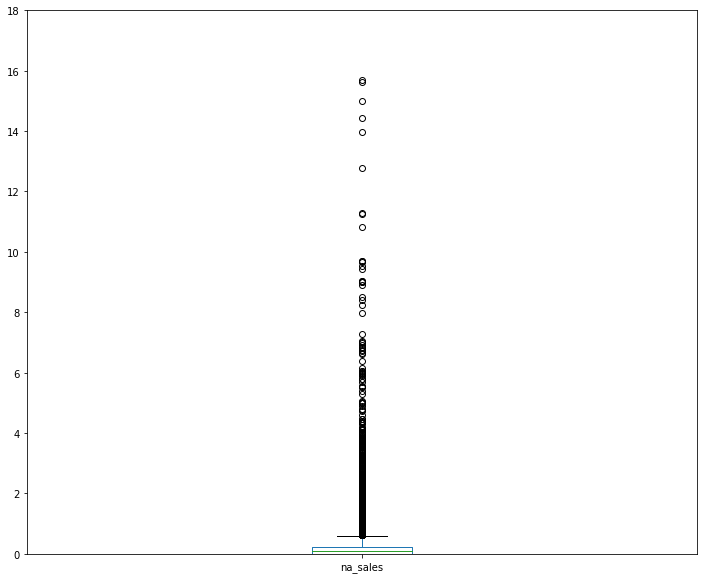

In [23]:
data['na_sales'].plot(kind='box', figsize=(12, 10))
plt.ylim (0,18)
plt.show()

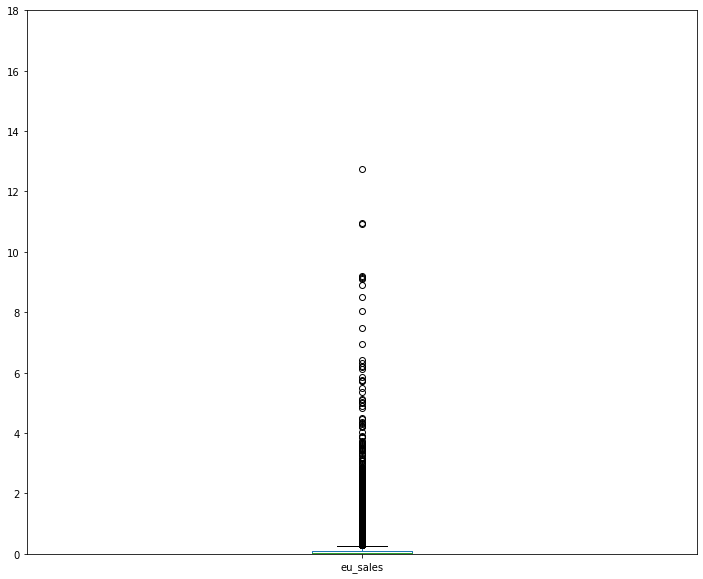

In [24]:
data['eu_sales'].plot(kind='box', figsize=(12, 10))
plt.ylim (0,18)
plt.show()

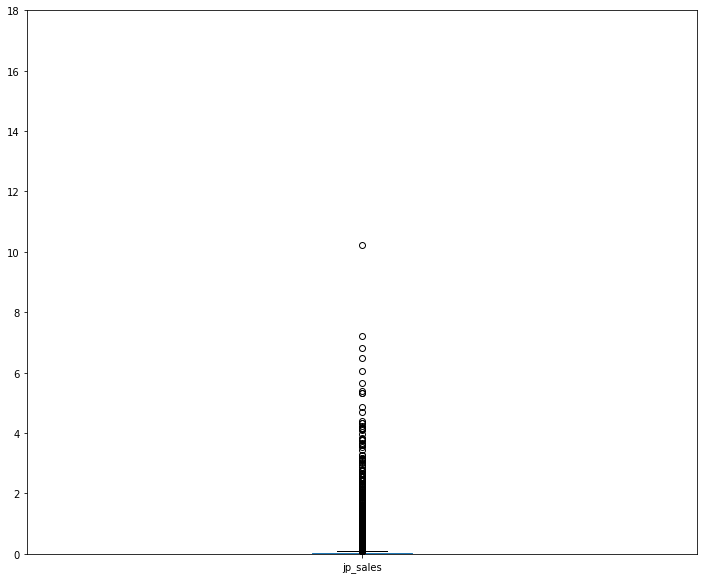

In [25]:
data['jp_sales'].plot(kind='box', figsize=(12, 10))
plt.ylim (0,18)
plt.show()

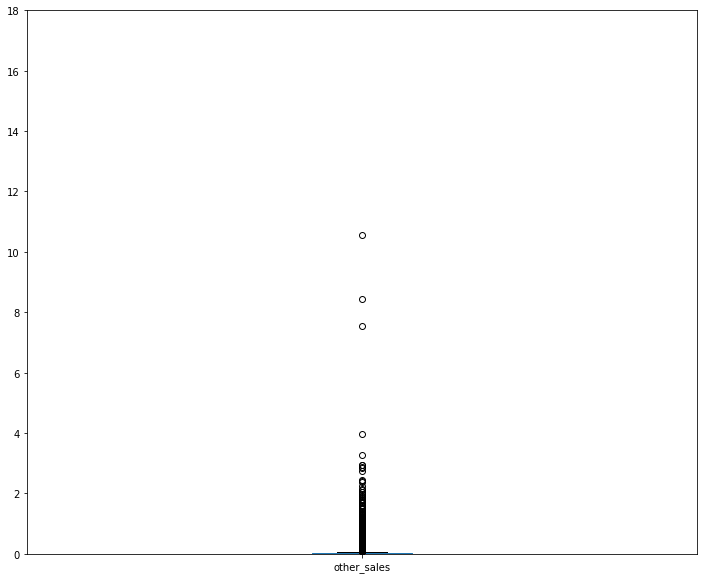

In [26]:
data['other_sales'].plot(kind='box', figsize=(12, 10))
plt.ylim (0,18)
plt.show()

На этих ящиках с усами можно наблюдать явные выбросы значений, однако я не считаю рациональным удаление слишком популярных игр из датасета.

Также я не считаю рациональным искать выбросы с тех данных, которые находятся в рамках логически допустимого диапазона (например, оценка критиков в диапазоне от 0 до 100, выше значений нет).

## Новые данные

Для дальнейшего анализа потребуются данные по общим суммарным продажам (млн. проданных копий игр).

In [27]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,without,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,without,31.38


## Иccледовательский анализ данных

Стоит начать исследовательский анализ данных с поиска актуального периода для дальнейшего анализа и проверки гипотез.  
Для этого сначала следует рассмотреть количество выпущенных игр в разные годы.

In [28]:
years_and_games = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').sort_values(by = 'year_of_release')
years_and_games.reset_index(inplace= True)
years_and_games

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


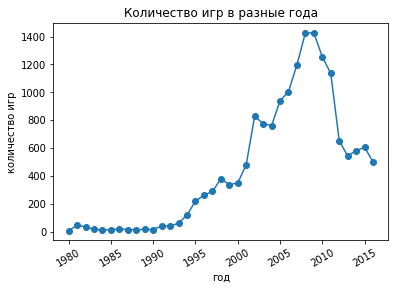

In [29]:
years_and_games.plot(x = 'year_of_release', xlabel='год', ylabel = 'количество игр', rot=30, style = '-o', title = 'Количество игр в разные года', legend = False)
plt.show()

**Вывод:** можно заметить, что в 1994 году количество выпущенных игр выросло в 2 раза по сравнению с предыдущим годом. Предполагаю, что этот год оказался знаковым в развитии игровой индустрии. После 1994 индустрия начала новый темп развития, однако, после 2011 года производительность компаний снизилась, что может быть спровоцировано тем, что увеличилась трудозатратность производства из-за ожиданий пользователей, конкуренции с предыдущими выпущенными играми и другим причинам.

Далее следует посмотреть, как распределяются продажи копий игр по платформам.

In [30]:
platforms_and_games = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales')
platforms_and_games.reset_index(inplace= True)
platforms_and_games

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


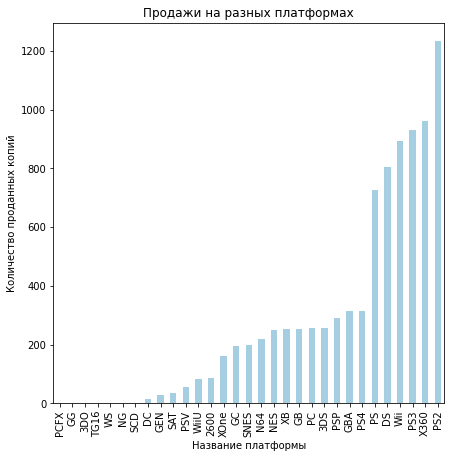

In [31]:
platforms_and_games.plot(x = 'platform', y = 'total_sales', xlabel = 'Название платформы', ylabel = 'Количество проданных копий', kind='bar',
        title='Продажи на разных платформах', legend = False, figsize = (7, 7), colormap='Paired')
plt.show()

**Вывод:** Итак, по таблице и графику можно вычленить топ-6 платформ, лидирующих по продажам копий игр, - это PS, DS, Wii, PS3, X360 и PS2, поскольку PS отличается от предыдущей по значению продаж более чем в 2 раза. 

Далее их следует изучить по-подробнее и рассмотреть распределение продаж по годам.

In [32]:
six = platforms_and_games['platform']
top_six =  six.tail(6).to_list()
top_six

['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

In [33]:
filtred_top_six_platforms = data[data['platform'].isin(top_six)]

top_six_platforms_years = filtred_top_six_platforms.pivot_table(index = 'year_of_release', columns = 'platform', values = ['total_sales'], aggfunc = 'sum')
#top_six_platforms_years.sort_values(by = 'year_of_release')

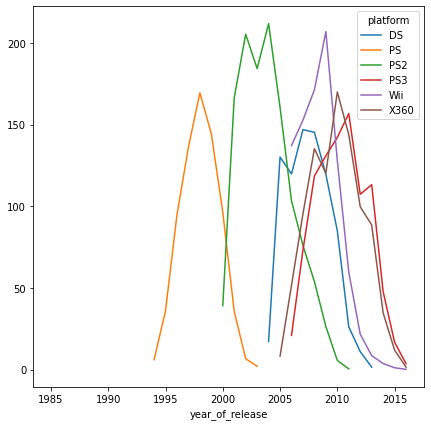

In [34]:
top_six_platforms_years.plot(y = 'total_sales', legend = 'platform', figsize = (7, 7))
plt.show()

**Вывод:** таким образом условный период, за который появляются новые и исчезают старые платформы это 10 лет. Это следует учитывать для прогноза.

На предыдущих этапах были рассмотрены продажи у 6 популярных игровых платформ и было обнаружено, что платформа "изживает себя" за 10 лет. К началу 2016 года прекратили свое функционирование 3 популярные платформы - PS, PS2 и DS. Чтобы не брать для анализа мертвые тренды бывших популярных платформ, актуальным периодом для дальнейшего анализа станет период между 2014 и 2016, когда DS прекратит свое существование (останутся только актуальные тренды). 

In [35]:
new_data = data[data['year_of_release'] >= 2014]
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,without,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,without,7.98


In [36]:
new_data.shape

(1689, 12)

Рассмотрим то, как меняются продажи в зависимости от платформ. 

In [37]:
new_games_in_platform = new_data.pivot_table(index = 'year_of_release', columns = 'platform', values = ['total_sales'], aggfunc = 'sum')

In [38]:
new_games_in_platform.reset_index()
new_games_in_platform

total_sales                                                  \
platform                3DS     PC    PS3     PS4   PSP    PSV   Wii   WiiU   
year_of_release                                                               
2014                  43.76  13.28  47.76  100.00  0.24  11.90  3.75  22.03   
2015                  27.78   8.52  16.82  118.90  0.12   6.25  1.14  16.35   
2016                  15.14   5.25   3.60   69.25   NaN   4.25  0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

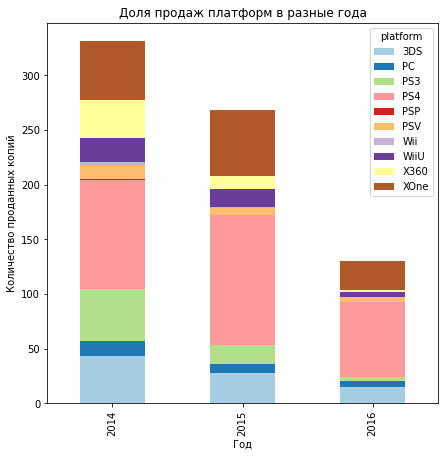

In [39]:
#from itertools import cycle, islice

#my_colors = ['black', 'darkgreen', 'rosybrown', 'grey', 'brown', 'salmon', 'sienna', 'darkorange', 'darkkhaki', 'lawngreen', 'ligthseagreen', 'purple']
new_games_in_platform.plot(xlabel = 'Год', ylabel = 'Количество проданных копий', y = 'total_sales', kind='bar', stacked=True,
        title='Доля продаж платформ в разные года', legend = 'platform', figsize = (7, 7), colormap='Paired')
plt.show()

**Вывод:** На данном графике видно, что за 3 года продажи абсолютно всех 10ти платформ снизились. Следовательно, платформ, у которых продажи ростут нет. Поэтому, чтобы определить прибыльные компании нужно рассмотреть с точки зрения сохранения платформой за собой положения в рейтинге прибыльности. Таким образом, PS4 и XOne наиболее прибыльны чем другие платформы на протяжении 3х лет, слудовательно, можно предположить, что в 2017 году эта тенденция сохранится. 

Построим график "ящик с усами", чтобы посмотреть, как распределяются продажи по платформам (за все года функционирования платформ).

<AxesSubplot:>

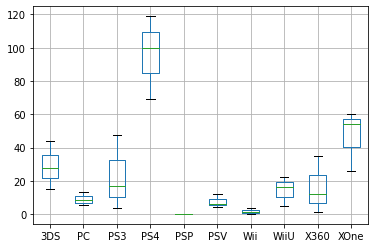

In [40]:
new_games_in_platform['total_sales'].boxplot()

**Вывод:** на данном графике мы можем видеть своеобразную историю продаж платформ, так как он содержит данные за все года актуального периода. Самой неудачной в плане продаж платформой можно назвать PSP, так как ящик имеет самую низкую медиану. Если ранжировать платформы по успешности продаж (судя по медиане количества проданных копий игр), то в топе-5 окажутся: PS4 (медиана выше остальных более, чем в 2 раза), XOne, 3DS, PS3, WiiU (соответсвенно). Это ещё раз подтверждает, что PS4 и XOne достаточно перспективные платформы, которые могут повляить на успешность продажи игры в 2017 году. 

Теперь следует рассмотреть как влиют отзывы на продажи. Для этого я возьму платформу PS4, для оценки вляния отзывов критиков и пользователей. Но сначала следует подготовить данные.

In [41]:
ps4 = new_data[new_data['platform'] == 'PS4']
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,without,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,without,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


<AxesSubplot:title={'center':'Зависимость продаж от оценки критиков'}, xlabel='Оценка критиков', ylabel='Количество проданных копий'>

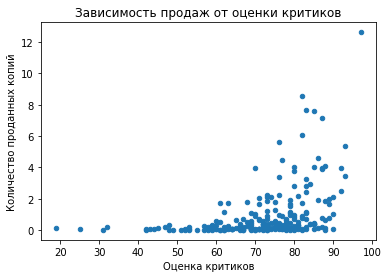

In [42]:
ps4.plot(xlabel = 'Оценка критиков', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки критиков")

In [43]:
ps4['total_sales'].corr(ps4['critic_score'])

0.40266141068104083

<AxesSubplot:title={'center':'Зависимость продаж от оценки пользователей'}, xlabel='Оценка пользователей', ylabel='Количество проданных копий'>

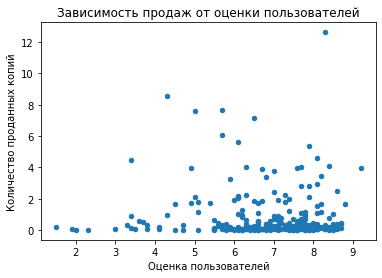

In [44]:
ps4.plot(xlabel = 'Оценка пользователей', ylabel = 'Количество проданных копий', x='user_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки пользователей")

In [45]:
ps4['total_sales'].corr(ps4['user_score'])

-0.040131589472697356

**Вывод:** Проанализировав коэффициент корреляции Пирсона можно сказать, что оценки критиков имеют среднее положительное влияние на успехом продаж копий игр на платформе PS4 (при повышении оценки критиков продажи умеренно повышаются), а также то, что оценки пользователей не связаны с успехом продаж копий игр на платформе PS4 (при повышении оценки пользователей продажи не меняются). 

Далее я рассмотрю влияние отзывов ещё на одну перспективную платформу - XOne. 

In [46]:
x_one = new_data[new_data['platform'] == 'XOne']
x_one

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,without,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,without,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,without,0.01


<AxesSubplot:title={'center':'Зависимость продаж от оценки критиков'}, xlabel='Оценка критиков', ylabel='Количество проданных копий'>

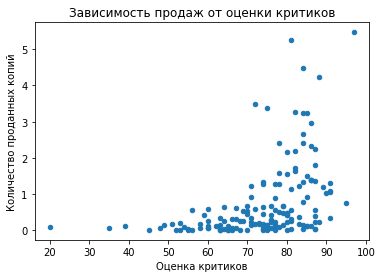

In [47]:
x_one.plot(xlabel = 'Оценка критиков', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки критиков")

In [48]:
x_one['total_sales'].corr(x_one['critic_score'])

0.42867694370333226

<AxesSubplot:title={'center':'Зависимость продаж от оценки критиков'}, xlabel='Оценка пользователей', ylabel='Количество проданных копий'>

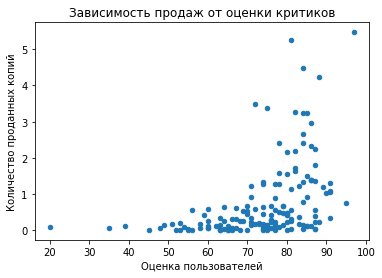

In [49]:
x_one.plot(xlabel = 'Оценка пользователей', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки критиков")

In [50]:
x_one['total_sales'].corr(x_one['user_score'])

-0.0703839280647581

**Вывод:** Проанализировав коэффициент корреляции Пирсона можно сказать, что оценки критиков имеют среднее положительное влияние на успехом продаж копий игр на платформе XOne (при повышении оценки критиков продажи умеренно повышаются), а также то, что оценки пользователей не связаны с успехом продаж копий игр на платформе XOne (при повышении оценки пользователей продажи не меняются). 

Для повышения точности анализа и сделанных выводов, следует рассмотреть оставшиеся платформы из топа-5 для оценки влияния отзывов на продажи.

In [51]:
ds3 = new_data[new_data['platform'] == '3DS']
ds3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,without,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,without,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,without,7.14
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,without,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16599,Legends of Oz: Dorothy's Return,3DS,2014,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01


<AxesSubplot:title={'center':'Зависимость продаж от оценки критиков'}, xlabel='Оценка критиков', ylabel='Количество проданных копий'>

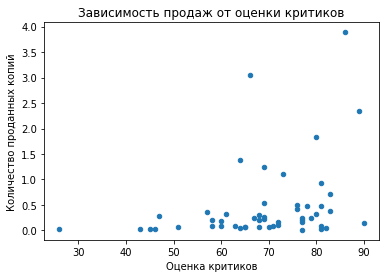

In [52]:
ds3.plot(xlabel = 'Оценка критиков', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки критиков")

In [53]:
ds3['total_sales'].corr(ds3['critic_score'])

0.31411749286905105

<AxesSubplot:title={'center':'Зависимость продаж от оценки пользователей'}, xlabel='Оценка пользователей', ylabel='Количество проданных копий'>

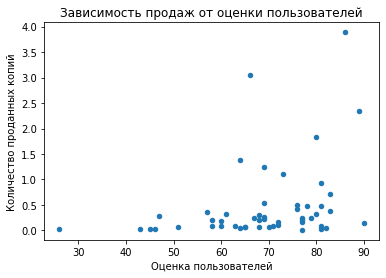

In [54]:
ds3.plot(xlabel = 'Оценка пользователей', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки пользователей")

In [55]:
ds3['total_sales'].corr(ds3['user_score'])

0.2151932718527028

**Вывод:** Проанализировав коэффициент корреляции Пирсона можно сказать, что оценки критиков имеют среднее положительное влияние на успехом продаж копий игр на платформе 3DS (при повышении оценки критиков продажи умеренно повышаются), а также то, что оценки пользователей имеют среднее положительное влияние на успехом продаж копий игр на платформе 3DS (при повышении оценки критиков продажи умеренно повышаются). 

In [56]:
ps3 = new_data[new_data['platform'] == 'PS3']
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,without,5.27
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,NaN,3.2,E,2.70
1021,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,NaN,5.1,M,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,without,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,without,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01


<AxesSubplot:title={'center':'Зависимость продаж от оценки критиков'}, xlabel='Оценка критиков', ylabel='Количество проданных копий'>

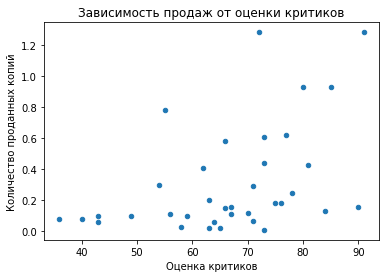

In [57]:
ps3.plot(xlabel = 'Оценка критиков', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки критиков")

In [58]:
ps3['total_sales'].corr(ps3['critic_score'])

0.44657460493190704

<AxesSubplot:title={'center':'Зависимость продаж от оценки пользователей'}, xlabel='Оценка пользователей', ylabel='Количество проданных копий'>

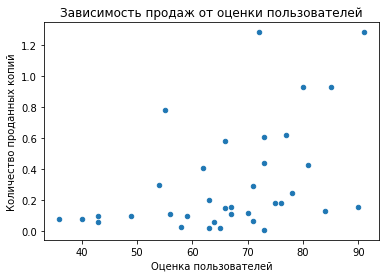

In [59]:
ps3.plot(xlabel = 'Оценка пользователей', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки пользователей")

In [60]:
ps3['total_sales'].corr(ps3['user_score'])

-0.16676141347662116

**Вывод:** Проанализировав коэффициент корреляции Пирсона можно сказать, что оценки критиков имеют среднее положительное влияние на успех продаж копий игр на платформе PS3 (при повышении оценки критиков продажи умеренно повышаются), а также то, что оценки пользователей имеют очень умеренное негативное влияние на успех продаж копий игр на платформе PS3 (при повышении оценки пользователей продажи умеренно снижаются). 

In [61]:
wiiu = new_data[new_data['platform'] == 'WiiU']
wiiu

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,without,4.87
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
424,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,3.21
1174,Mario Party 10,WiiU,2015,Misc,0.69,0.53,0.24,0.12,66.0,6.5,E,1.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16376,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16412,Legend of Kay Anniversary,WiiU,2015,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01
16420,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,0.01
16510,Art Academy: Home Studio,WiiU,2015,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01


<AxesSubplot:title={'center':'Зависимость продаж от оценки критиков'}, xlabel='Оценка критиков', ylabel='Количество проданных копий'>

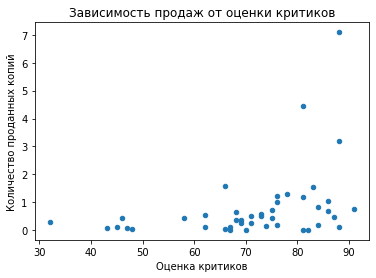

In [62]:
wiiu.plot(xlabel = 'Оценка критиков', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки критиков")

In [63]:
wiiu['total_sales'].corr(wiiu['critic_score'])

0.370201412480884

<AxesSubplot:title={'center':'Зависимость продаж от оценки пользователей'}, xlabel='Оценка пользователей', ylabel='Количество проданных копий'>

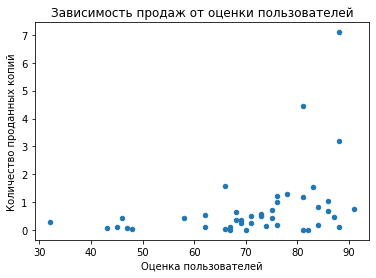

In [64]:
wiiu.plot(xlabel = 'Оценка пользователей', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки пользователей")

In [65]:
wiiu['total_sales'].corr(wiiu['user_score'])

0.4079264579217078

**Вывод:** Проанализировав коэффициент корреляции Пирсона можно сказать, что оценки критиков имеют среднее положительное влияние на успех продаж копий игр на платформе WiiU (при повышении оценки критиков продажи умеренно повышаются), а также то, что оценки пользователей имеют среднее положительное влияние на успех продаж копий игр на платформе WiiU (при повышении оценки пользователей продажи умеренно повышаются). 

Далее следует рассмотреть влияние отзывов на продажи по всему датасету.

<AxesSubplot:title={'center':'Зависимость продаж от оценки критиков'}, xlabel='Оценка критиков', ylabel='Количество проданных копий'>

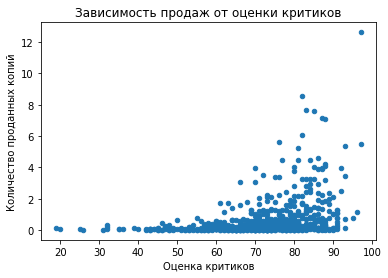

In [66]:
new_data.plot(xlabel = 'Оценка критиков', ylabel = 'Количество проданных копий', x='critic_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки критиков")

In [67]:
new_data['total_sales'].corr(new_data['critic_score'])

0.328105086966363

<AxesSubplot:title={'center':'Зависимость продаж от оценки пользователей'}, xlabel='Оценка пользователей', ylabel='Количество проданных копий'>

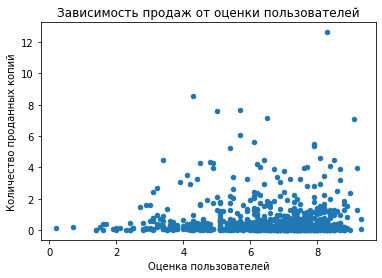

In [68]:
new_data.plot(xlabel = 'Оценка пользователей', ylabel = 'Количество проданных копий', x='user_score', y='total_sales', kind='scatter', title = "Зависимость продаж от оценки пользователей")

In [69]:
new_data['total_sales'].corr(new_data['user_score'])

-0.013070305002484585

**Вывод:** проанализировав графики рассеяния и показатель корреляции Пирсона, можно сказать, что картина влияния отзывов на продажи изменяется от платформы к платформе, отдако прослеживается общая тенденция к более сильному положительному влиянию оценок критиков на продажи, чем оценок пользователей (коэффициент корреляции близок к 0).

Теперь рассмотрим распределение игр по жанрам.

In [70]:
genre_and_games = new_data.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').sort_values(by = 'name')
genre_and_games.reset_index(inplace= True)
genre_and_games

,genre,name
0,Puzzle,14
1,Strategy,37
2,Platform,38
3,Simulation,44
4,Fighting,60
5,Racing,69
6,Misc,113
7,Shooter,128
8,Sports,161
9,Adventure,185


<AxesSubplot:title={'center':'Распределение количества выпущенных игр по жанрам'}, xlabel='Игровой жанр', ylabel='Количество выпущенных игр'>

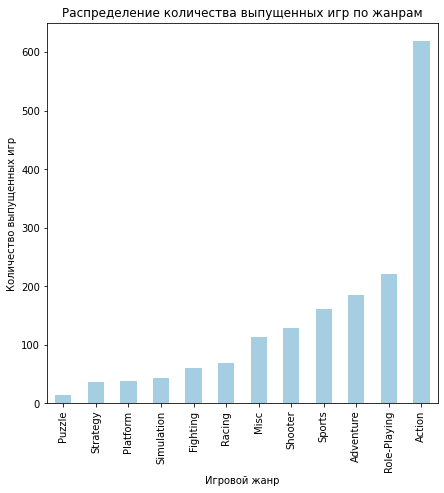

In [71]:
genre_and_games.plot(xlabel = 'Игровой жанр', ylabel = 'Количество выпущенных игр', x = 'genre', y = 'name', kind='bar',
        title='Распределение количества выпущенных игр по жанрам', legend = False, figsize = (7, 7), colormap='Paired')

In [72]:
genre_and_sales = new_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales')
genre_and_sales.reset_index(inplace= True)
genre_and_sales

,genre,total_sales
0,Adventure,0.030
1,Puzzle,0.045
2,Strategy,0.060
3,Action,0.090
4,Misc,0.090
5,Racing,0.090
6,Simulation,0.100
7,Role-Playing,0.110
8,Fighting,0.125
9,Platform,0.140


<AxesSubplot:title={'center':'Зависимость продаж от игрового жанра'}, xlabel='Игровой жанр', ylabel='Количество проданных копий игр'>

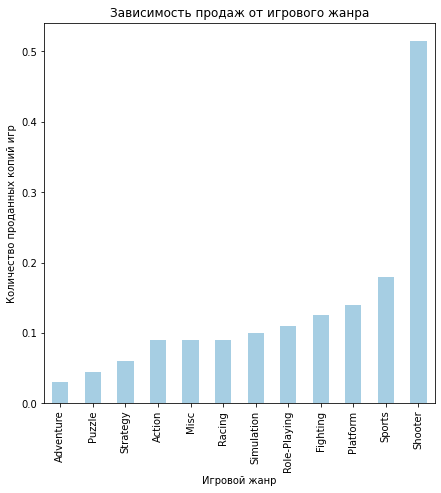

In [73]:
genre_and_sales.plot(xlabel = 'Игровой жанр', ylabel = 'Количество проданных копий игр', x = 'genre', y = 'total_sales', kind='bar',
        title='Зависимость продаж от игрового жанра', legend = False, figsize = (7, 7), colormap='Paired')

**Вывод:** в качестве метрики по оценке прибыльности игровых жанров была взята медиана (более устойчива к выбросам чем среднее) продаж за весь период, поскольку так можно определить жанры, которые приносят определенный стабильный доход. Таким образом, Shooter стал жанром, который стабильно приносит высокий доход, но имеет относительно небольшой игровой ассортимент. Action имеет самый широкий игровой ассортимент, но относительно небольшие доходы. Если обозначить топ-6 прибыльных жанров, то это будут Shooter, Sports, Platform, Fighting, Role-Playing и Simulation, соответственно. В целом низкими продажами можно назвать 0.030 млн копий, а высокими - 0.515 млн копий.

Далее следует рассмотреть портрет пользователя по регионам - Америке, Европе и Японии. 

In [74]:
usa = new_data.groupby('platform')['na_sales'].sum().sort_values()
usa

platform
PSP      0.00
Wii      2.08
PSV      2.52
PC       7.23
WiiU    19.36
PS3     22.05
3DS     22.64
X360    28.30
XOne    81.27
PS4     98.61
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Зависимость продаж от платформы'}, xlabel='Платформа', ylabel='Количество проданных копий игр'>

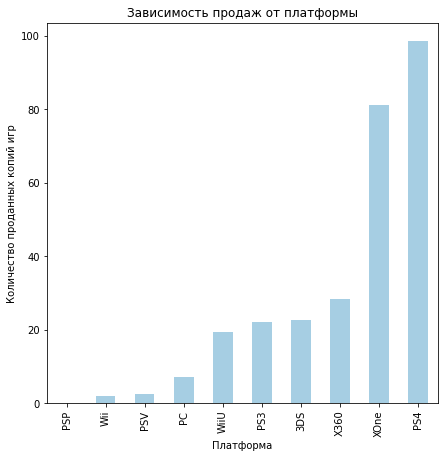

In [75]:
usa.plot(xlabel = 'Платформа', ylabel = 'Количество проданных копий игр', x = 'platform', y = 'na_sales', kind='bar',
        title='Зависимость продаж от платформы', legend = False, figsize = (7, 7), colormap='Paired')

In [76]:
usa = new_data.groupby('genre')['na_sales'].sum().sort_values()
usa

genre
Puzzle           0.65
Strategy         0.98
Simulation       2.63
Adventure        5.64
Platform         6.79
Racing           8.74
Fighting        12.43
Misc            15.05
Role-Playing    33.47
Sports          46.13
Action          72.53
Shooter         79.02
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Зависимость продаж от игрового жанра'}, xlabel='Игровой жанр', ylabel='Количество проданных копий игр'>

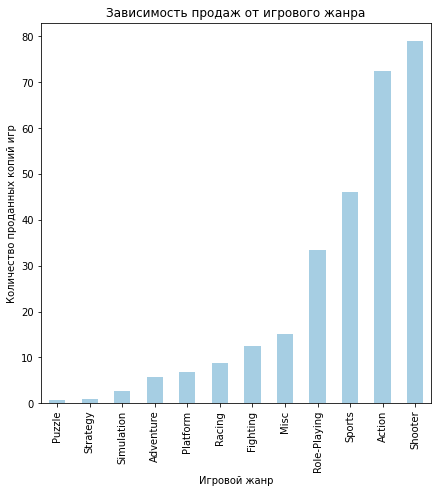

In [77]:
usa.plot(xlabel = 'Игровой жанр', ylabel = 'Количество проданных копий игр', x = 'genre', y = 'na_sales', kind='bar',
        title='Зависимость продаж от игрового жанра', legend = False, figsize = (7, 7), colormap='Paired')

In [78]:
usa = new_data.groupby('rating')['na_sales'].sum().sort_values()
usa

rating
E10+       33.23
T          38.95
E          50.74
without    64.72
M          96.42
Name: na_sales, dtype: float64

Text(0, 0.5, 'продажи')

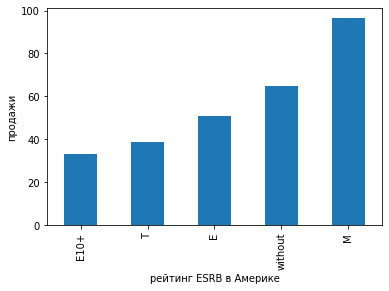

In [79]:
usa.plot.bar()
plt.xlabel("рейтинг ESRB в Америке")
plt.ylabel("продажи")

**Портрет пользователя из Америки**  
- Топ-5 платформ, которые пользуются популярностью в данном регионе:  
1. PS4
2. XOne
3. X360
4. 3DS
5. PS3  

Пользователи данного региона используют 2 перспективные платформы (было спрогнозировано мной ранее). В данном регионе ипользуются американские и японские приставки в соотношении 2/3, соответственно. 
- Топ-5 жанров, которые пользуются популярностью в данном регионе:  
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Misc  

Возможно, пользователей из данного региона привлекают игры, требующей некоторой реакции (в целом их можно отнести к подвижным).  
- По данным о продаже по возрастному рейтингу можно сказать, что есть некоторая зависимость, между возрастным рейтингам и продажами - чем старше возрастная категория, тем больше покупают игры. Однако, третья по популярности категория универсальна, а вторая без рейтинга. 

In [80]:
eu = new_data.groupby('platform')['eu_sales'].sum().sort_values()
eu

platform
PSP       0.00
Wii       2.59
PSV       3.53
WiiU     13.15
X360     15.49
3DS      16.12
PC       17.97
PS3      25.54
XOne     46.25
PS4     130.04
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'Зависимость продаж от платформы'}, xlabel='Платформа', ylabel='Количество проданных копий игр'>

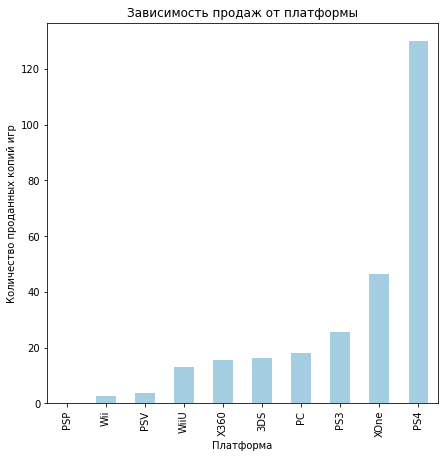

In [81]:
eu.plot(xlabel = 'Платформа', ylabel = 'Количество проданных копий игр', x = 'platform', y = 'eu_sales', kind='bar',
        title='Зависимость продаж от платформы', legend = False, figsize = (7, 7), colormap='Paired')

In [82]:
eu = new_data.groupby('genre')['eu_sales'].sum().sort_values()
eu

genre
Puzzle           0.52
Strategy         1.79
Adventure        6.49
Fighting         6.69
Platform         6.80
Simulation       7.30
Misc            12.86
Racing          14.13
Role-Playing    28.17
Sports          45.73
Shooter         65.52
Action          74.68
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'Зависимость продаж от игрового жанра'}, xlabel='Игровой жанр', ylabel='Количество проданных копий игр'>

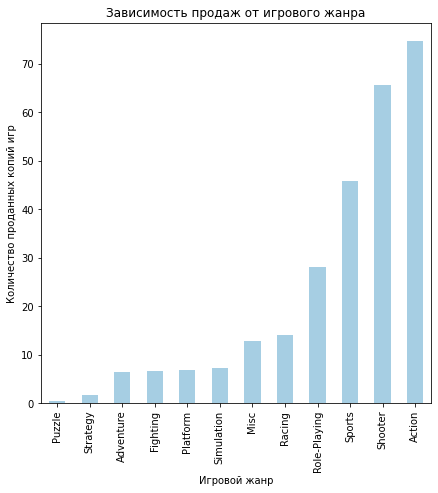

In [83]:
eu.plot(xlabel = 'Игровой жанр', ylabel = 'Количество проданных копий игр', x = 'genre', y = 'eu_sales', kind='bar',
        title='Зависимость продаж от игрового жанра', legend = False, figsize = (7, 7), colormap='Paired')

In [84]:
eu = new_data.groupby('rating')['eu_sales'].sum().sort_values()
eu

rating
E10+       26.16
T          34.07
E          58.06
without    58.95
M          93.44
Name: eu_sales, dtype: float64

Text(0, 0.5, 'продажи')

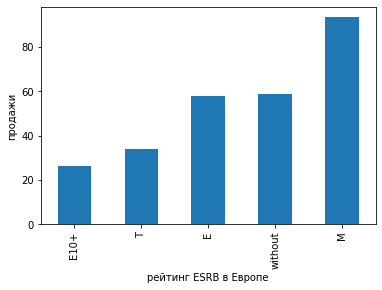

In [85]:
eu.plot.bar()
plt.xlabel("рейтинг ESRB в Европе")
plt.ylabel("продажи")

**Портрет пользователя из Европы**  
- Топ-5 платформ, которые пользуются популярностью в данном регионе:  
1. PS4
2. XOne
3. PS3
4. PC
5. 3DS  

В целом здесь присутствуют те же категории платформ, что и в Америке,за исключением PC. Топ-2 в которые входят предсказанные перспективные платформы также сохраняется. Соотношения использования платформ от американских и японских производителей остается таким же, как у американских пользователей.
- Топ-5 жанров, которые пользуются популярностью в данном регионе:  
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Rasing  

Здесь можно наблюдать те же предпочтения в жанрах игр, что и у американских пользователей, однако в Европе пользователи также играют в игры жанра Rasing.

- По данным о продаже по возрастному рейтингу можно сказать, что распределение по категориям рейтинга точно такое же, как у американских пользователей. 

In [86]:
jp = new_data.groupby('platform')['jp_sales'].sum().sort_values()
jp

platform
PC       0.00
Wii      0.00
X360     0.08
XOne     0.32
PSP      0.36
WiiU     7.31
PS3     11.22
PSV     14.54
PS4     15.02
3DS     44.24
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'Зависимость продаж от платформы'}, xlabel='Платформа', ylabel='Количество проданных копий игр'>

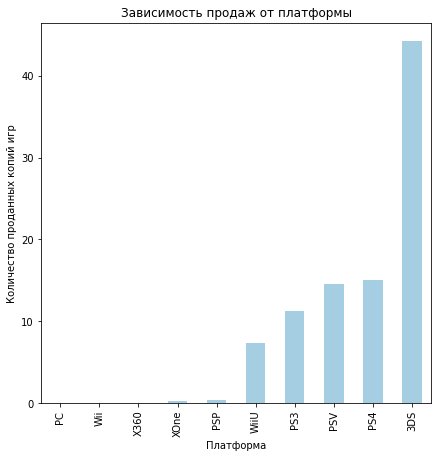

In [87]:
jp.plot(xlabel = 'Платформа', ylabel = 'Количество проданных копий игр', x = 'platform', y = 'jp_sales', kind='bar',
        title='Зависимость продаж от платформы', legend = False, figsize = (7, 7), colormap='Paired')

In [88]:
jp = new_data.groupby('genre')['jp_sales'].sum().sort_values()
jp

genre
Puzzle           0.93
Strategy         0.95
Racing           1.76
Simulation       2.31
Platform         2.69
Sports           3.26
Adventure        3.60
Shooter          4.87
Misc             5.61
Fighting         6.37
Action          29.58
Role-Playing    31.16
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'Зависимость продаж от игрового жанра'}, xlabel='Игровой жанр', ylabel='Количество проданных копий игр'>

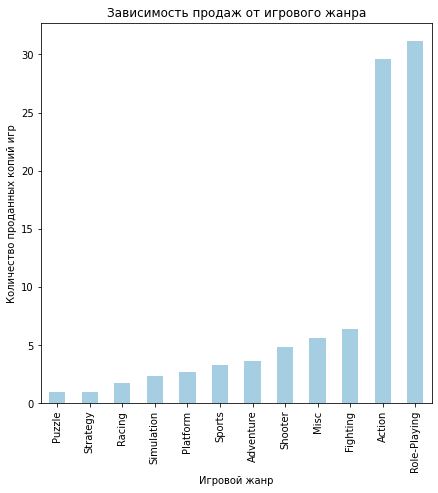

In [89]:
jp.plot(xlabel = 'Игровой жанр', ylabel = 'Количество проданных копий игр', x = 'genre', y = 'jp_sales', kind='bar',
        title='Зависимость продаж от игрового жанра', legend = False, figsize = (7, 7), colormap='Paired')

In [90]:
jp = new_data.groupby('rating')['jp_sales'].sum().sort_values()
jp

rating
E10+        4.46
M           8.01
E           8.94
T          14.78
without    56.90
Name: jp_sales, dtype: float64

Text(0, 0.5, 'продажи')

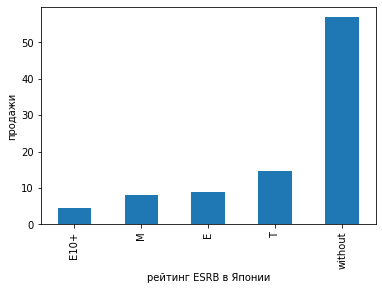

In [91]:
jp.plot.bar()
plt.xlabel("рейтинг ESRB в Японии")
plt.ylabel("продажи")

**Портрет пользователя из Японии**  
- Топ-5 платформ, которые пользуются популярностью в данном регионе:  
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU  

Пользователи из Японии предпочитают покупать на платформах серии PlayStation и Nintendo (3DS и WiiU), поскольку данные серии приставок производятся в Японии. 

- Топ-5 жанров, которые пользуются популярностью в данном регионе:  
1. Role-Playing
2. Action
2. Fighting
3. Misc
4. Shooter

В данном регионе все так же популярны игры на некотрую подвижность внимания, данный жанровый набор крайне схож с тем, на что спрос а Америке.  

- По данным о продаже по возрастному рейтингу можно сказать, что распределение не похоже на 2 предыдущих региона, теперь игр для подростков больше, чем игр для взрослых, категория для всех так и остается второй по популярности категорией с рейтингом и игр без какого-либо рейтинга покупается больше всего в данном регионе. Можно сказать, что основная израющая возрастная категория - подростки. 

Теперь следует проверить пару частных гипотез.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   
H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [92]:
xone = new_data.query('platform == "XOne"')['user_score'].dropna()
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [93]:
pc = new_data.query('platform == "PC"')['user_score'].dropna()
pc

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64

In [94]:
from scipy import stats as st
import numpy as np

alpha = 0.05
results = st.ttest_ind(xone, pc, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Я сформулировала две противоположные по смыслу гипотезы, поскольку нужно выяснить, одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC. Собственно, вывод таков, что они действительно равны.  
Для проверки гипотез был использован t-распределение Стьюдента, так как требудется проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (из генеральной совокупности были взяты только данные по играм на 2х платформах).  

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [95]:
action = new_data.query('genre == "Action"')['user_score'].dropna()
action

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64

In [96]:
sports = new_data.query('genre == "Sports"')['user_score'].dropna()
sports

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64

In [97]:
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Я сформулировала две противоположные по смыслу гипотезы, поскольку нужно выяснить, одинаковы ли средние пользовательские рейтинги жанров Action и Sports. Собственно, вывод таков, что они разные.  
Для проверки гипотез был использован t-распределение Стьюдента, так как требудется проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (из генеральной совокупности были взяты только данные по играм 2х жанров).  

## Общий вывод

В ходе исследования, направленного на выявление факторов, вляющих на успех прожажи компьютерной игры в 2017 году были поставлены гипотезы:  
- Прибыльными платформами - PS любого номера, Wii, Xbox и DS.  
- Отзывы пользователей влияют на продажи игр.  
- Отзывы критиков влияют на продажи игр. 
- Прибыльные жанры игр -  Shooter, Sports, Racing и Action.  
- То, на какой игровой платформе размещена игра влияет на успешность продажи игры.   
- Рейтинг ESRB влияет на продажи. 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
- Средние пользовательские рейтинги жанров Action и Sports не разные.

В связи с этим были получены следующие результаты:

- В качестве актуального периода для прогноза успешности продаж игр в 2017 году выступил период с 2014 по 2016 года.

- лидирующими платформами за весь период являются 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'. Среди них есть платформы серии PS, Wii, Xbox и DS. Гипотезу можно считать подтвержденной.  
Если рассматривать перспективные платформы, которые являются лидирующими в нескольких регионах в актуальный для прогноза период, то это будут PS4 и XOne.

In [104]:
platforms_and_games.tail(6)

,platform,total_sales
25,PS,727.58
26,DS,802.78
27,Wii,891.18
28,PS3,931.34
29,X360,961.24
30,PS2,1233.56


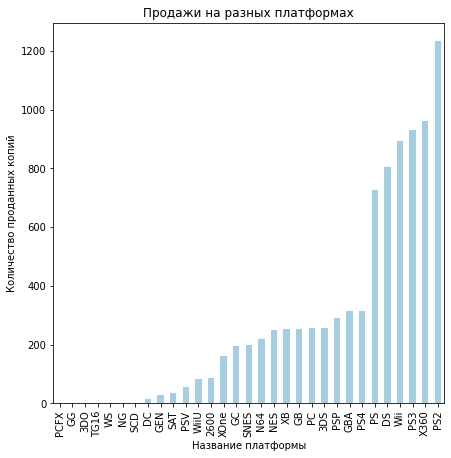

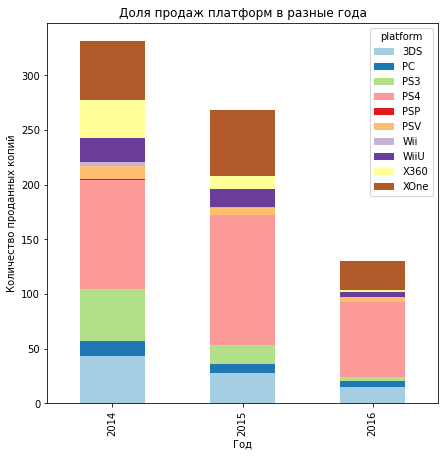

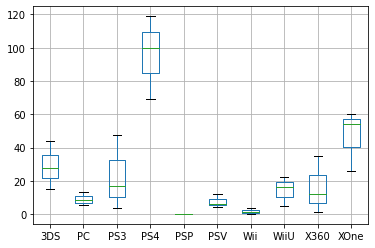

- На успешность продаж игры на 5ти популярных платформах умеренно положительно влияют оценки критиков.

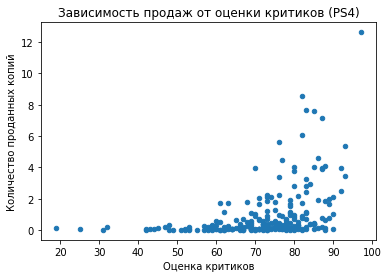

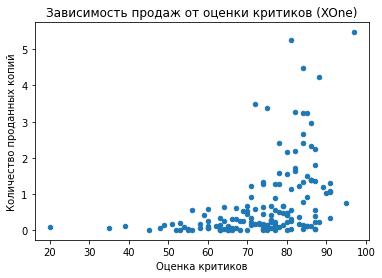

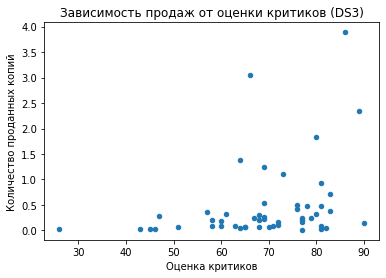

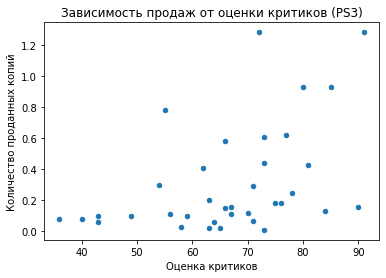

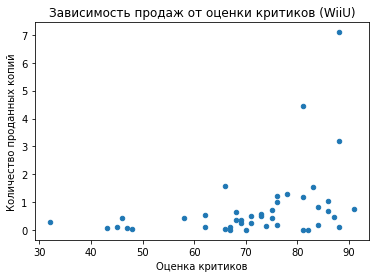

- На успешность продаж игры на 5ти популярных платформах оценки пользователей влияют в меньшей степени, чем критиков

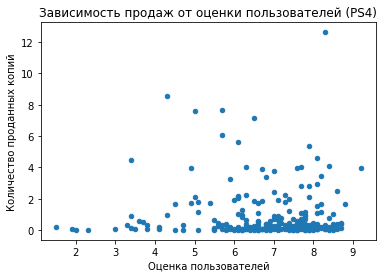

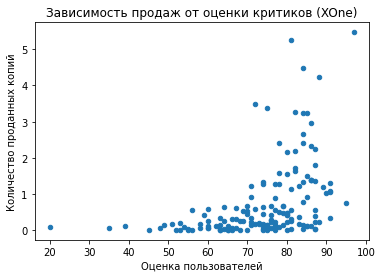

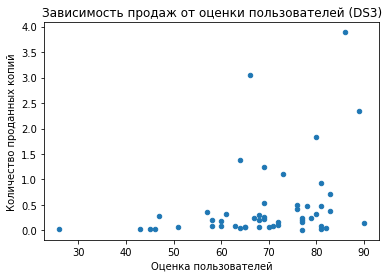

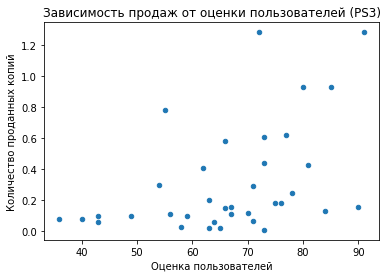

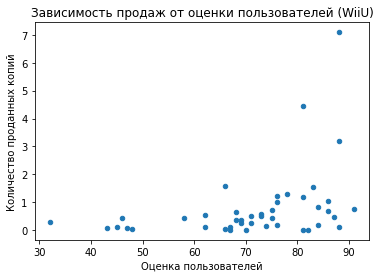

- Прибыльными жанрами компьютерных игр стали Shooter, Sports, Platform, Fighting, Role-Playing и Simulation, так что гипотезу можно считать частично подтвержденной, так как Aсtion и Racing не вошли в категорию прибыльных. 

In [105]:
genre_and_sales

,genre,total_sales
0,Adventure,0.030
1,Puzzle,0.045
2,Strategy,0.060
3,Action,0.090
4,Misc,0.090
5,Racing,0.090
6,Simulation,0.100
7,Role-Playing,0.110
8,Fighting,0.125
9,Platform,0.140


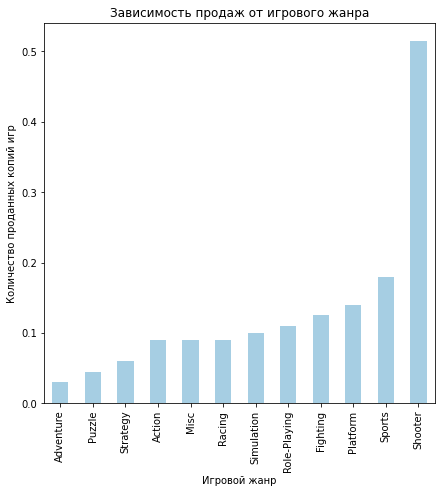

- изучение влияния возрастного рейтинга ESRB показало, что есть некоторая связь с успешностью продаж и возрастной тенденцией. В 2х из 3х рассмотренных регионов наибольшие продажи у игр для взрослых и меньшие у игр для всех от 10ти лет.

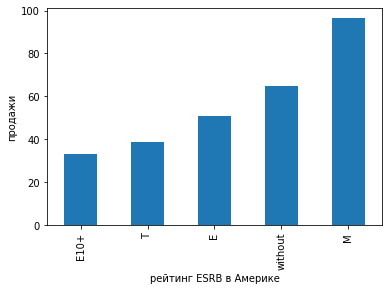

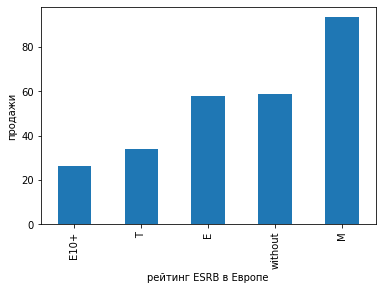

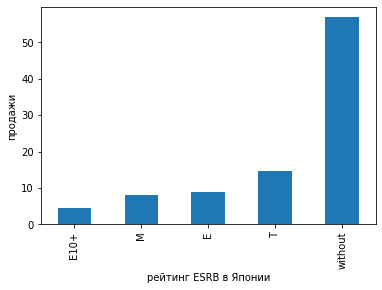

- Статистическая проверка показала, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (p-значение: 0.11601398086668832).

- Статистическая проверка показала, что средние пользовательские рейтинги жанров Action и Sports разные, поскольку нулевая гипотеза о том, что они одинаковые была отвергнута в ходе анализа (p-значение: 1.1825550382644557e-14)

На основе вышеприведенных выводов можно заключить, что для наиболее успешных продаж игры (при условии, что ее будут создавать с нуля по "успешному шаблону") трубуется:
- разместить данную игру на платформе XOne или PS4 (перспективные платформы на 2016 год) 
- чтобы она относилась к игровым жанрам Shooter, Sports, Platform, Fighting, Role-Playing или Simulation  
- имела высокие оценки критиков
- учитывала жанровые предпочтения региона, в котором будет продаваться. 

В остальных случаях слишком сложно создать модель прогноза только на основе имеющихся данных.